# **Team name:** Horror Text miners
# **Project title:** Horror Author Recognition

### **Group Members:**
- David Medina (F11115117)
- Kevin Da Rosa (F11115108)
- Jaime Colman (F11115107)


# ***Setting up Google Colab to work***

### Checking installed packages
- Checking which version of packages the google colab has installed

In [1]:
# pip list
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

print("Tensorflow version: ", tf.__version__)
print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Torch version: ", torch.__version__)

Tensorflow version:  2.12.0
Numpy version:  1.22.4
Pandas version:  1.5.3
Torch version:  2.0.1+cu118


### Import DataSet from Kaggle using Hosted runtime

In [2]:
import os
import shutil

# Check if the file "SpookyDataset" exists
if os.path.isfile("SpookyDataset"):
  # If the file exists, remove the directory and its contents
  shutil.rmtree("./SpookyDataset/")

# Clone the Git repository from the specified URL
!git clone https://github.com/mjacker/SpookyDataset

Cloning into 'SpookyDataset'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 1.79 MiB | 1.87 MiB/s, done.


### Checking path directory...
- Depending on the OS: Windows, or Linux, the Python path directory is different


In [3]:
# Just to see the Python path directory where the program runs, due to Google
# colab connecting to a Linux environment, however, it is posible to connect
# through Windows to it
import sys
import os

# Print the command-line arguments passed to the script
sys.argv
print(sys.argv)

# Get the absolute path of the notebook file
notebook_path = os.path.abspath("ypykernel_launcher.py")

print(notebook_path)

['/usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-31ed102a-6e8d-48cc-9fa4-d8981f1ece5d.json']
/content/ypykernel_launcher.py


# ***Analyzing, and Processing the Dataset***

### Preprocessing Functions
- Functions to preprocess the column 'text' within the tables

In [4]:
import nltk as nltk
nltk.download('punkt')
import gensim
import numpy as np
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
#import stopwords
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS

#------------------------------------- FUNCTIONS -----------------------------#

#--Preprocesser--#
def preprocesser_string(text):
  preprocessed = []
  text = text.lower()
  #tokenization
  textLineQuery = tokenerFunc(text)
  #stop word removal
  text = stopWordFunc(textLineQuery)
  #apostrophe removal
  text = apostrRemvFunc(text)
  # #stemming
  text = tokenerFunc(text)
  text = stemmerFunc(text)
  #punctuation removal
  text = puncRemvFunc(text)
  #convert number to words if meaningful numerial information in document found
  return " ".join(text)

#--Tokener--#
def tokenerFunc(text):
    text = word_tokenize(text);
    return text

#--StopWord Removal--#
def stopWordFunc(text):
    allTokens = [tkn for tkn in text if tkn not in STOPWORDS and len(tkn) > 2]
    text = " ".join(allTokens)
    return text

#--Apostrophe Removal--#
def apostrRemvFunc(text):
    RemovText = text.replace("'", "")
    RemovText = text.replace('"', "")
    RemovText = text.replace('`', "")
    return RemovText

#--Stemming--#
def stemmerFunc(tokenizedText):
    stemmer = PorterStemmer()
    stemminged = []
    stemminged = [stemmer.stem(w) for w in tokenizedText]
    stemmed = ' '.join(stemminged)
    return stemmed

#--Punctuation Removal--#
def puncRemvFunc(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    return text

#---------------------------------- END FUNCTIONS -----------------------------#

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
preprocesser_string("An apple a day keep the doctor away")

'appl day doctor away'

### Opening the files, and reading the contents

In [6]:
# File paths of the Dataset
test_csv = "./SpookyDataset/test.csv"
train_csv = "./SpookyDataset/train.csv"

In [7]:
# We will work with pandas, so we read the .csv into a panda
import pandas as pd

train_pd = pd.read_csv(train_csv) # panda of train.csv

In [8]:
# Table of train data
train_pd

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


### Analyze the Dataset
- Show the distribution of texts for each author



In [9]:
train_pd['author'].value_counts() # retrieve column 'author',
                                  # and counts unique columns

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

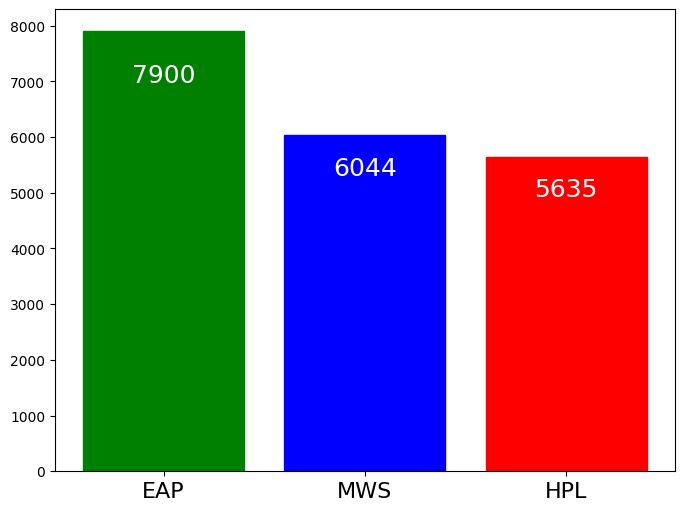

In [10]:
# Create a new figure and axes
fig, ax = plt.subplots(1,1,figsize=(8,6))

# Count the occurrences of each author
author_vc = train_pd.author.value_counts()

# Create a bar plot using the author value counts, and
# set the x-axis tick labels to the author names
ax.bar(range(3), author_vc)
ax.set_xticks(range(3))
ax.set_xticklabels(author_vc.index, fontsize=16)

# Iterate over the bar patches, colors, and values
for rect, c, value in zip(ax.patches, ['g', 'b', 'r'], author_vc.values):
    rect.set_color(c) # set the color

    height = rect.get_height() # rectangle dimensions
    width = rect.get_width()

    x_loc = rect.get_x()

    # Add text annotation to the plot at the center of the rectangle
    ax.text(x_loc + width/2, 0.9*height, value, ha='center', va='center', fontsize=18, color='white')

### Preprocess the Dataset
- Show WordClouds of each author

In [11]:
# Encoding the 'author' column
# 0 = EAP, 1 = HPL, and 2 = MWS

train_pd['author_id'] = train_pd.author.map({'EAP':0, 'HPL':1, 'MWS':2})

train_pd.head()

,id,text,author,author_id
0,id26305,"This process, however, afforded me no means of...",EAP,0
1,id17569,It never once occurred to me that the fumbling...,HPL,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1


In [12]:
# Preproccesing the column 'text', and saving the results into
# 'text_preprocessed' column

train_pd["text_processed"] = train_pd.text.apply(lambda x: preprocesser_string(x))

train_pd.head()

,id,text,author,author_id,text_processed
0,id26305,"This process, however, afforded me no means of...",EAP,0,process afford mean ascertain dimens dungeon c...
1,id17569,It never once occurred to me that the fumbling...,HPL,1,occur fumbl mere mistak
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0,left hand gold snuff box caper hill cut manner...
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2,love spring look windsor terrac sixteen fertil...
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1,find gold superintend abandon attempt perplex ...


In [13]:
# Separate the train panda, into the 3 groups of authors
EAP_pd = train_pd[train_pd['author'] == 'EAP']['text_processed']
HPL_pd = train_pd[train_pd['author'] == 'HPL']['text_processed']
MWS_pd = train_pd[train_pd['author'] == 'MWS']['text_processed']

# Describe statistics of each author pandas
print(EAP_pd.describe()) # should count 7900
print('-----------------------------------------')
print(HPL_pd.describe()) # should count 5635
print('-----------------------------------------')
print(MWS_pd.describe()) # should count 6044

count     7900
unique    7855
top           
freq        11
Name: text_processed, dtype: object
-----------------------------------------
count     5635
unique    5629
top           
freq         6
Name: text_processed, dtype: object
-----------------------------------------
count     6044
unique    6027
top           
freq        12
Name: text_processed, dtype: object


In [14]:
EAP_pd.head() # print the first 5 of EAP

0    process afford mean ascertain dimens dungeon c...
2    left hand gold snuff box caper hill cut manner...
6    astronom point took refug suggest non luminos ...
7                            surcingl hung riband bodi
8    knew stereotomi brought think atomi theori epi...
Name: text_processed, dtype: object

In [15]:
HPL_pd.head() # print the first 5 of HPL

1                               occur fumbl mere mistak
4     find gold superintend abandon attempt perplex ...
12    herbert west need fresh bodi life work reanim ...
13    farm like ground extend deepli hill wheaton st...
19    facial aspect remark matur share mother grandf...
Name: text_processed, dtype: object

In [16]:
MWS_pd.head() # print the first 5 of MWS

3     love spring look windsor terrac sixteen fertil...
5     youth pass solitud best year spent gentl femin...
9     confess structur languag code govern polit sta...
10    shall feel injuri shall learn dread reveng day...
15    escap commenc destruct endless journey mountai...
Name: text_processed, dtype: object

In [17]:
# Top n-unigram
from sklearn.feature_extraction.text import CountVectorizer
from itertools import cycle, islice

# The function calculates the frequency of each word in a corpus and
# returns the top n words with their counts
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# The function is responsible for visualizing the top n words with their
# counts in a bar plot
def plot_top_n_words(corpus, n, msg = ""):
    common_words = get_top_n_words(corpus, n)

    df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

    words = []
    word_values = []

    for i, j in get_top_n_words(corpus, n):
      words.append(i)
      word_values.append(j)

    custom_font_size = 20.0

    fig, ax = plt.subplots(figsize=(16,8))
    ax.bar(range(len(words)), word_values, color=list(islice(cycle(["forestgreen", 'green', 'seagreen']), None, len(corpus))));
    ax.bar_label(ax.containers[0], label_type='edge', fontsize = custom_font_size)
    ax.set_facecolor('lightcyan')
    ax.set_xticks(range(len(words)));
    ax.set_xticklabels(words, rotation="vertical", fontsize = custom_font_size);
    ax.set_title(f"Top {n} words {msg}", fontsize = custom_font_size + 5.0)
    ax.set_xlabel("word", fontsize = custom_font_size + 5.0);
    ax.set_ylabel("number of occurences", fontsize = custom_font_size + 5.0)
    plt.show()

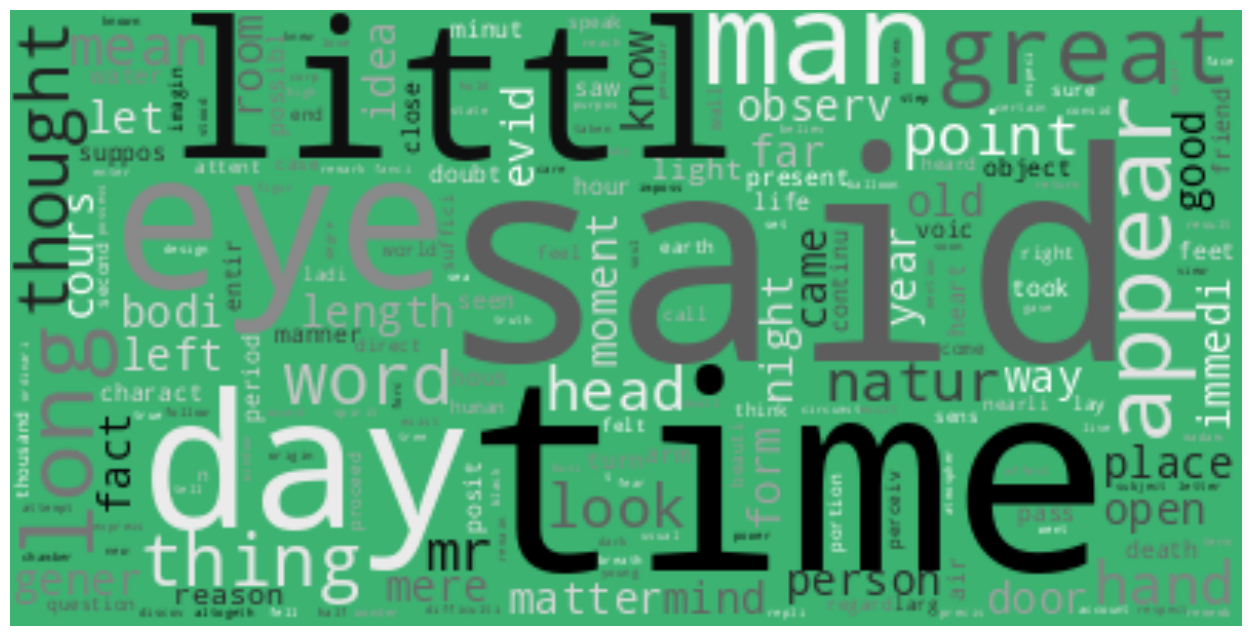

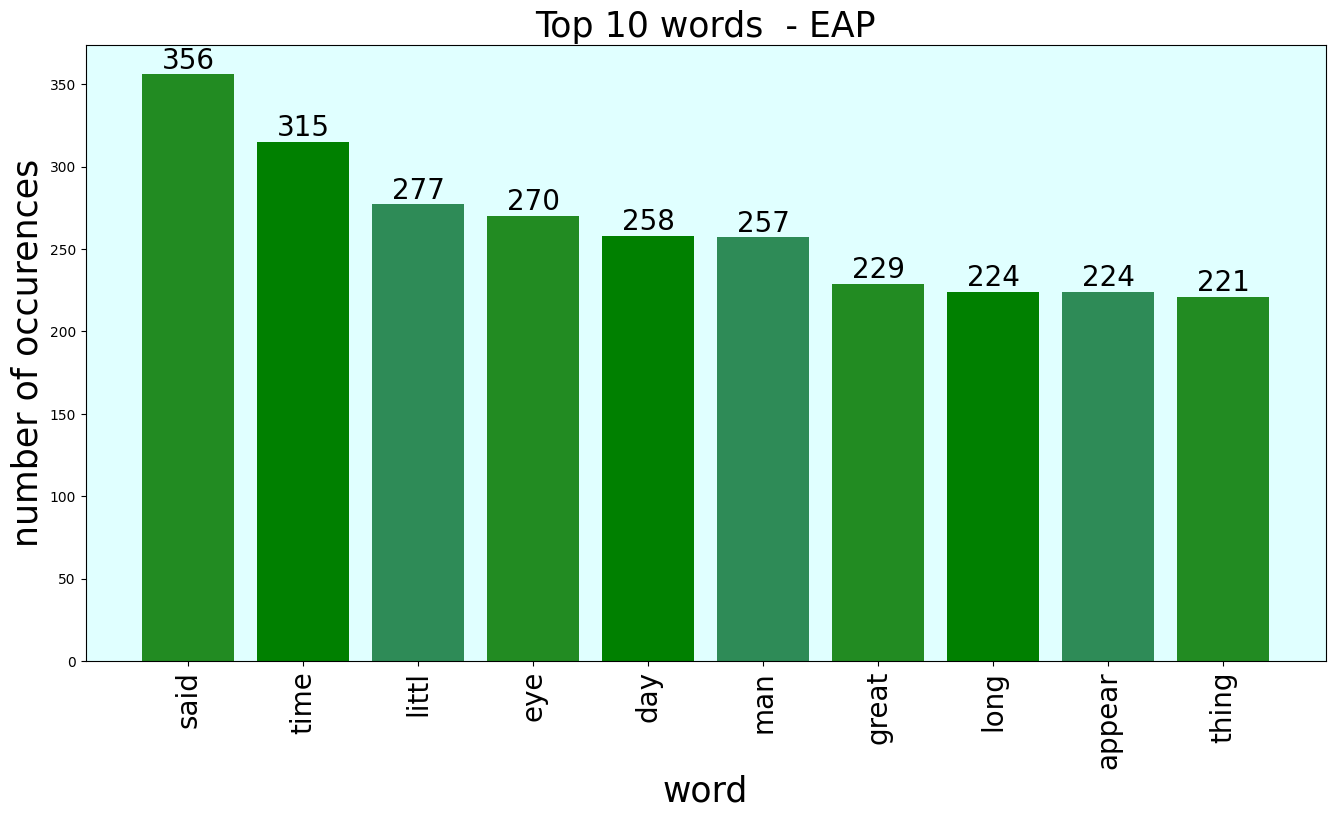

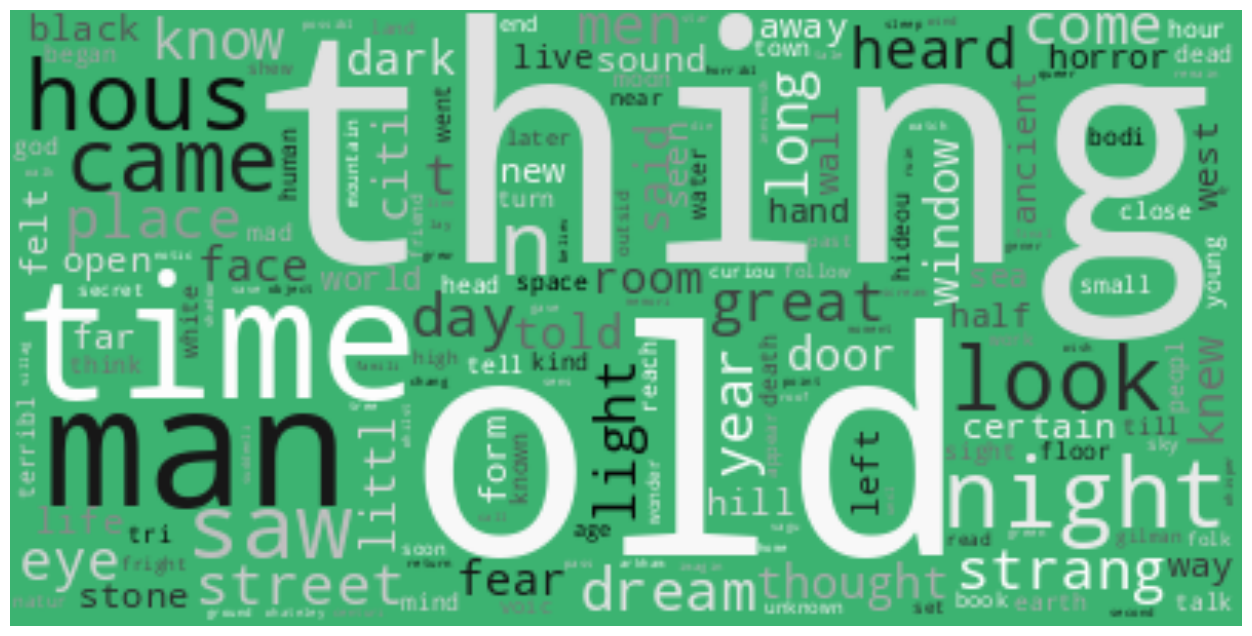

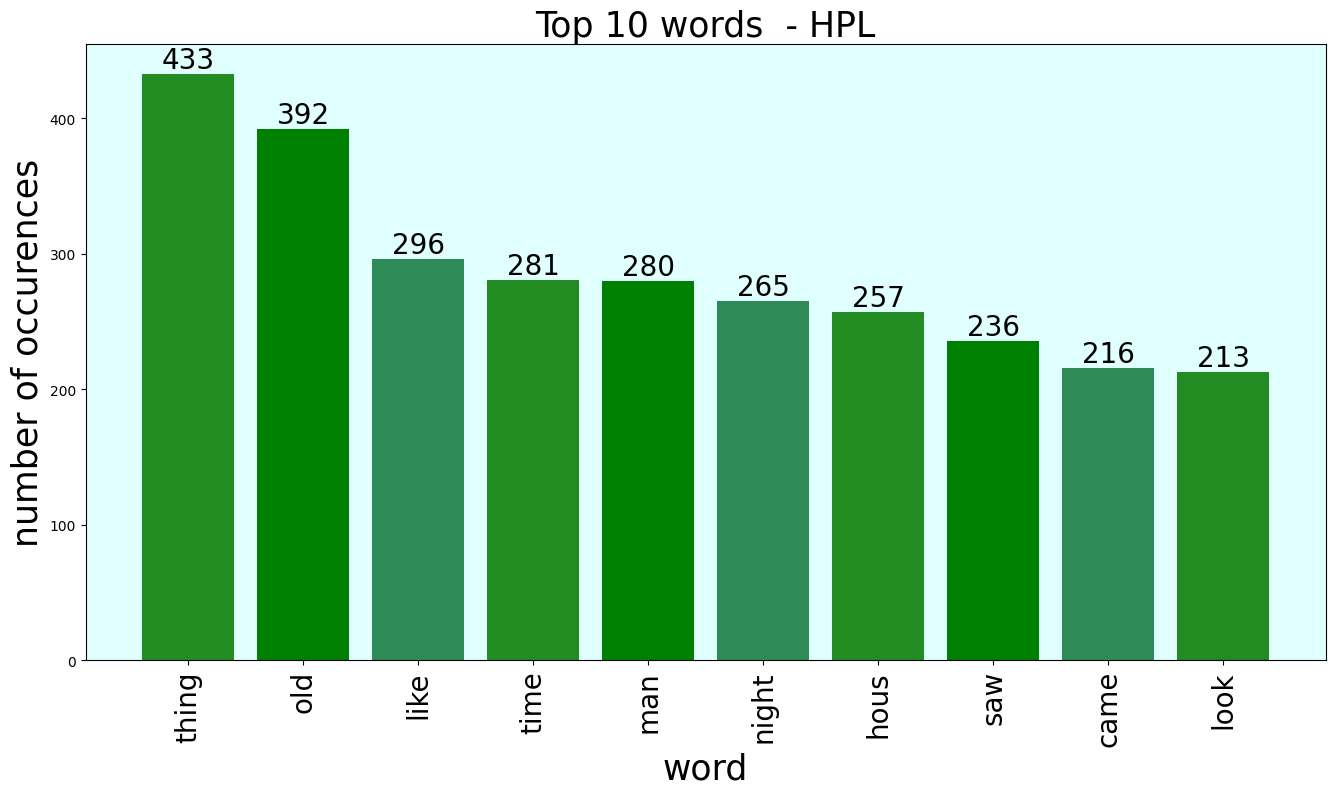

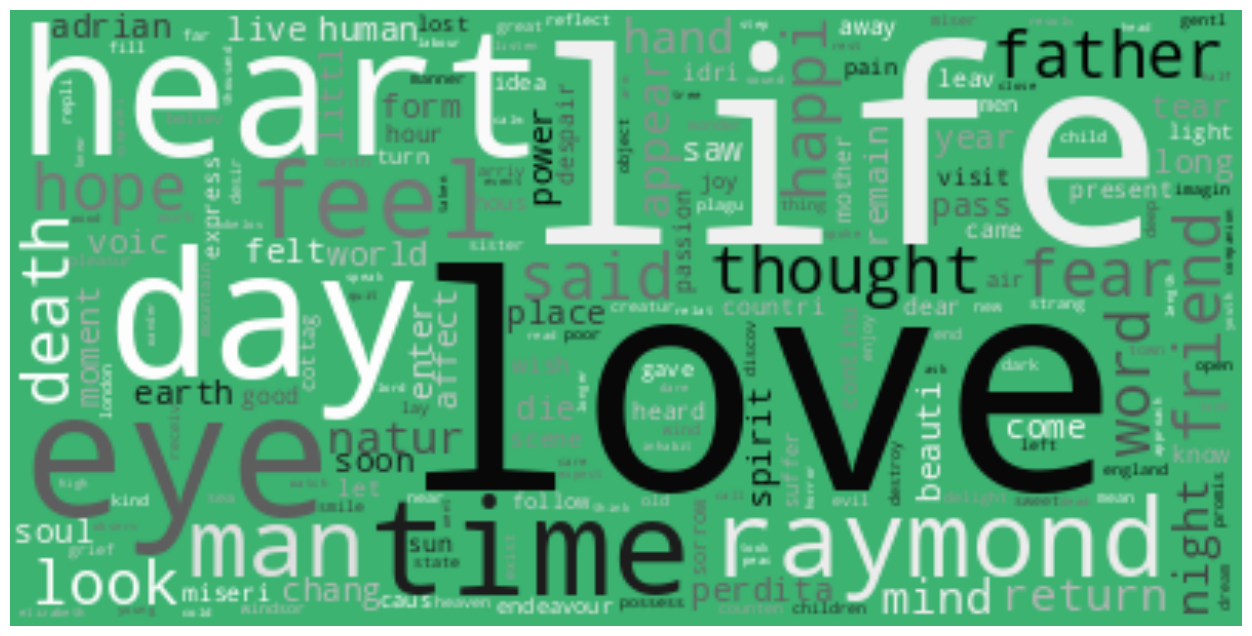

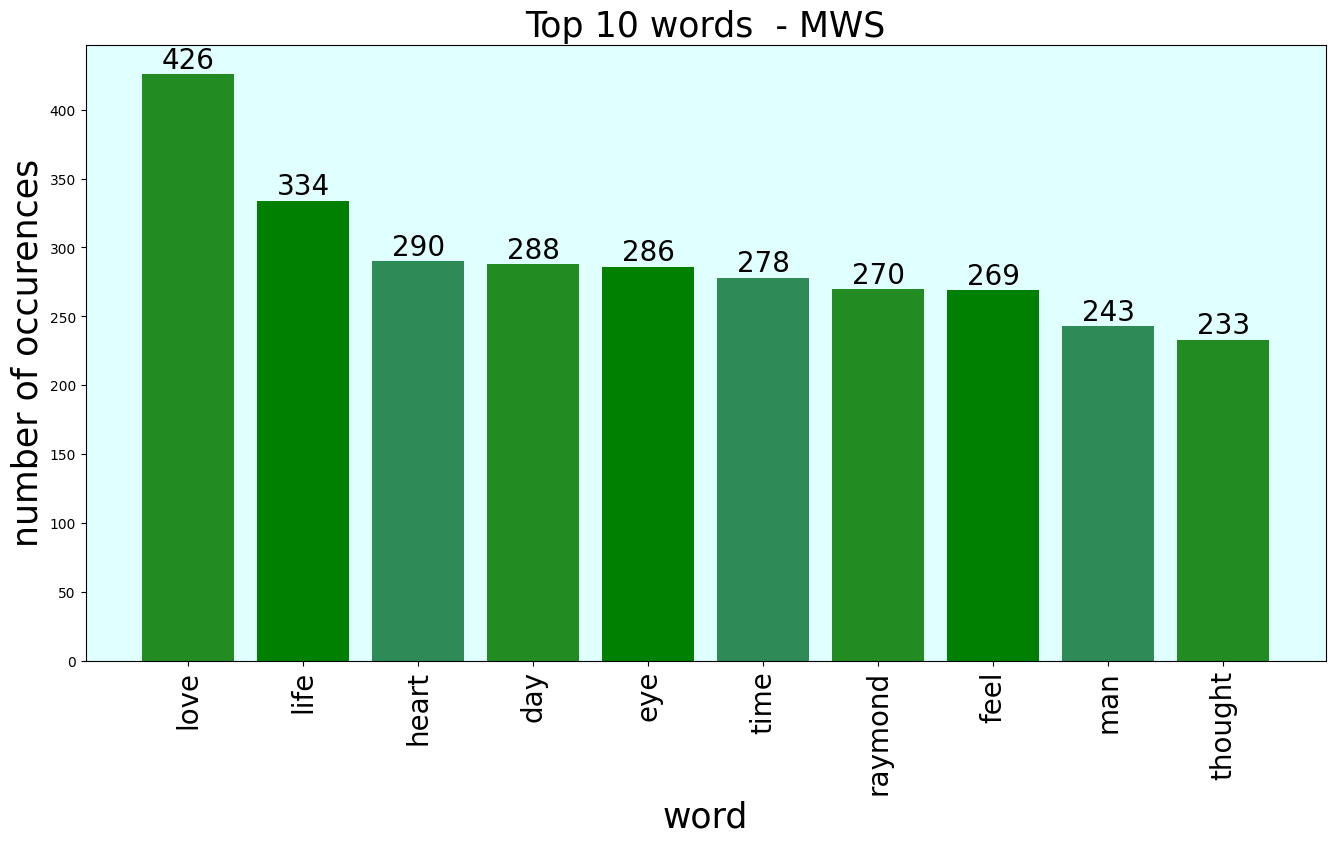

In [18]:
# Create WorCloud for each author

import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

# Creating a string of texts of each author
text_EAP = " ".join(title for title in EAP_pd)
text_HPL = " ".join(title for title in HPL_pd)
text_MWS = " ".join(title for title in MWS_pd)

# Colors for text, and background
colormap = 'Greys'
background_color = 'mediumseagreen'

#------------ WordCloud for EAP -----------------------------------------------#
wordCloud_EAP = WordCloud(collocations = False,
                        background_color = background_color,
                        colormap = colormap).generate(text_EAP)
plt.figure(figsize=(16,8))
plt.imshow(wordCloud_EAP, interpolation='bilinear')
plt.axis("off")
plt.show() # print WordCloud

plot_top_n_words(EAP_pd, 10, " - EAP") # print top n-words and the number of occurences

#------------ WordCloud for HPL -----------------------------------------------#
wordCloud_HPL = WordCloud(collocations = False,
                        background_color = background_color,
                        colormap = colormap).generate(text_HPL)
plt.figure(figsize=(16,8))
plt.imshow(wordCloud_HPL, interpolation='bilinear')
plt.axis("off")
plt.show() # print WordCloud

plot_top_n_words(HPL_pd, 10, " - HPL") # print top n-words and the number of occurences

#------------ WordCloud for MWS -----------------------------------------------#
wordCloud_MWS = WordCloud(collocations = False,
                        background_color = background_color,
                        colormap = colormap).generate(text_MWS)
plt.figure(figsize=(16,8))
plt.imshow(wordCloud_MWS, interpolation='bilinear')
plt.axis("off")
plt.show() # print WordCloud

plot_top_n_words(MWS_pd, 10, " - MWS") # print top n-words and the number of occurences

In [19]:
# Adding of sentiment features

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# The functions returns the sentiment score of each text column.
# A value greater than 0.05 is labeled as 'positive', inbetween 0.05 and -0.05
# is labeled as 'neutral', and lesser than -0.05 is labeled as 'negative'
def calculate_sentiment_score(text):
  score = sia.polarity_scores(text)
  return score['compound']

train_pd['sentiment_score'] = train_pd['text'].apply(calculate_sentiment_score)
train_pd.head(6)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,id,text,author,author_id,text_processed,sentiment_score
0,id26305,"This process, however, afforded me no means of...",EAP,0,process afford mean ascertain dimens dungeon c...,0.6329
1,id17569,It never once occurred to me that the fumbling...,HPL,1,occur fumbl mere mistak,-0.3400
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0,left hand gold snuff box caper hill cut manner...,0.9246
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2,love spring look windsor terrac sixteen fertil...,0.9460
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1,find gold superintend abandon attempt perplex ...,-0.8385
5,id22965,"A youth passed in solitude, my best years spen...",MWS,2,youth pass solitud best year spent gentl femin...,0.8714


In [20]:
HPL_sentiment = train_pd[train_pd['author'] == 'HPL']
HPL_sentiment.head(3) # to see the sentiment scores of HPL

,id,text,author,author_id,text_processed,sentiment_score
1,id17569,It never once occurred to me that the fumbling...,HPL,1,occur fumbl mere mistak,-0.3400
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1,find gold superintend abandon attempt perplex ...,-0.8385
12,id19764,Herbert West needed fresh bodies because his l...,HPL,1,herbert west need fresh bodi life work reanim ...,-0.4588


In [21]:
MWS_sentiment = train_pd[train_pd['author'] == 'MWS']
MWS_sentiment.head(3) # to see the sentiment scores of MWS

,id,text,author,author_id,text_processed,sentiment_score
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2,love spring look windsor terrac sixteen fertil...,0.9460
5,id22965,"A youth passed in solitude, my best years spen...",MWS,2,youth pass solitud best year spent gentl femin...,0.8714
9,id00912,I confess that neither the structure of langua...,MWS,2,confess structur languag code govern polit sta...,0.4215


### Partition train_pd
- Partition the train panda into: train and test sets for 'text_processed' and 'author_id' columns

In [22]:
# Define X and y from train panda

X = train_pd['text_processed'] # X equals to 'Texts'
y = train_pd['author_id'] # y equals to 'Labels'

In [23]:
from sklearn.model_selection import train_test_split

# X_train contains 'Texts', and the y_train contains the 'Labels', both are in
# the same index of the list. The same goes for X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2023,
                                                    stratify=y)

# Remember that X stands for 'Texts', and y for 'Labels'
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (15663,)
Shape of y_train:  (15663,)
Shape of X_test:  (3916,)
Shape of y_test:  (3916,)


In [24]:
X_train # random train set 80%

9582     shadow rest brazen doorway arch entablatur doo...
14509    frighten retain percept note speech articul so...
1322     word singular simpl one poet ebn zaiat diceb m...
17203    morn underfoot afternoon rise southeast roughl...
1545                                       heart ceas beat
                               ...                        
2796     summer wilbur repair shed farmyard began move ...
14876                                        england secur
15039    escap cut bureau time issuanc avidli collect m...
18279                       short breath word short breath
7573     say hasten away vault hors gestur gave hand ki...
Name: text_processed, Length: 15663, dtype: object

In [25]:
y_train # the corresponding labels of the train set

9582     0
14509    1
1322     0
17203    1
1545     0
        ..
2796     1
14876    2
15039    1
18279    0
7573     2
Name: author_id, Length: 15663, dtype: int64

In [26]:
# Examine the class distribution in y_train and y_test
# y -> classifies acording to author_id: 0, 1, & 2

print(y_train.value_counts())
print('-----------------------------------------')
print(y_test.value_counts())

0    6320
2    4835
1    4508
Name: author_id, dtype: int64
-----------------------------------------
0    1580
2    1209
1    1127
Name: author_id, dtype: int64


In [27]:
# Cross Validation of 5-Fold
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

### TF-IDF

In [28]:
# Remember that X stands for 'Texts', and y for 'Labels'

from sklearn.feature_extraction.text import TfidfVectorizer

# Learn vocabulary, create doc-term matrix, and calculate tf-idf
# for the 'Texts' of train set
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform to doc-term matrix, and calculate td-idf scores
# for the 'Texts' of test set
X_test_tfidf = vectorizer.transform(X_test)

# Print some vocabulary, and the size of the whole vocabulary
vocabulary = vectorizer.vocabulary_
print('Some vocabulary: ', sorted(list(vocabulary.keys()))[:10])
print('Size of whole vocabulary: ', len(vectorizer.vocabulary_))

Some vocabulary:  ['aaem', 'aback', 'abaft', 'abandon', 'abaout', 'abas', 'abash', 'abat', 'abbey', 'abbrevi']
Size of whole vocabulary:  14232


### ADDING FEATURES
* Adding the sentiment analysis feature to the TF-IDF matrix

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Example of SentimentIntensityAnalyzer
sia.polarity_scores("Wow, NLTK is really powerful!")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [30]:
# Returns sparse feature matrix with added feature.
def add_feature(X, feature_to_add):

    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [31]:
from string import punctuation
X_train_chars = X_train.str.len()
X_train_punc = X_train.apply(lambda x: len([c for c in str(x) if c in punctuation]))
X_test_chars = X_test.str.len()
X_test_punc = X_test.apply(lambda x: len([c for c in str(x) if c in punctuation]))

# Summing features of sentiment scores + character lenght
X_train_tfidf = add_feature(X_train_tfidf, [X_train_chars, X_train_punc])
X_test_tfidf = add_feature(X_test_tfidf, [X_test_chars, X_test_punc])

X_train_pos = X_train.apply(lambda x: sia.polarity_scores(x)["pos"])
X_train_neg = X_train.apply(lambda x: sia.polarity_scores(x)["neg"])
X_test_pos = X_test.apply(lambda x: sia.polarity_scores(x)["pos"])
X_test_neg = X_test.apply(lambda x: sia.polarity_scores(x)["neg"])

# Summing features of positive and negative sentiments
X_train_tfidf = add_feature(X_train_tfidf, [X_train_pos, X_train_neg])
X_test_tfidf = add_feature(X_test_tfidf, [X_test_pos, X_test_neg])

In [32]:
# Convert X_train_tfidf to a Pandas DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=["tfidf_" + str(i) for i in range(X_train_tfidf.shape[1])])

# Summing features of character length and punctuation count
X_train_tfidf_df['char_length'] = X_train_chars
X_train_tfidf_df['punctuation_count'] = X_train_punc

# Summing features of positive and negative sentiments
X_train_tfidf_df['positive_sent'] = X_train_pos
X_train_tfidf_df['negative_sent'] = X_train_neg

# Print the first 5 rows of the X_train_tfidf DataFrame
X_train_tfidf_df

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,tfidf_14230,tfidf_14231,tfidf_14232,tfidf_14233,tfidf_14234,tfidf_14235,char_length,punctuation_count,positive_sent,negative_sent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,81.0,0.0,0.000,0.000,102.0,0.0,0.000,0.000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,54.0,0.0,0.000,0.255,23.0,0.0,0.000,0.000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,116.0,0.0,0.000,0.000,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,64.0,0.0,0.000,0.000,130.0,0.0,0.448,0.000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,0.0,0.000,0.000,88.0,0.0,0.000,0.357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,57.0,0.0,0.000,0.000,NaN,NaN,NaN,NaN
15659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,0.000,0.000,NaN,NaN,NaN,NaN
15660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,65.0,0.0,0.000,0.189,28.0,0.0,0.000,0.000
15661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,30.0,0.0,0.000,0.000,67.0,0.0,0.000,0.000


# ***Text Classification***
* Making use of 5 different Traditional Machine Learning Models to compare performance

### Confusion Matrix Function

In [33]:
import seaborn as sns
sns.set_theme() # Set the default theme for seaborn

# The function creates a confusion matrix graph for the given model
def conf_matrix(y_true, y_pred, n_class, class_names = 'default', title_name = "Confusion Matrix", figsize = (6.25, 5), font_scale = 1, annot_kws_size = 12):
    if class_names == 'default':
        class_names = np.arange(n_class)
    tick_marks_y = np.arange(n_class) + 0.5 # Create y-axis tick marks
    tick_marks_x = np.arange(n_class) + 0.5 # Create x-axis tick marks

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred) # Calculate the confusion matrix
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(n_class), range(n_class)) # Convert the confusion matrix to a DataFrame

    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale) # Label size
    plt.title(title_name)

    # Plot the confusion matrix as a heatmap
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd', cmap=plt.cm.Blues)

    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.savefig('confmat.jpg')

    plt.show()

### Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Build Naive Bayes classification model
naive_bayes = MultinomialNB()

###### >> Evaluation metrics

In [35]:
# Measures accuracy, by comparing 'y_pred_test' that has the predicted authors
# with the list of actual autors in "y_test"
# score1 = metrics.accuracy_score(y_test, y_pred_test)
score1 = get_score(naive_bayes, X_train_tfidf, X_test_tfidf, y_train, y_test)
print('accuracy: %0.3f' % score1)

print('***********************************************************************')

# Train the model using the train set, where the model
# correlates 'Texts' to 'Labels'
naive_bayes.fit(X_train_tfidf, y_train)

# The model predicts the 'Labels' for the 'Texts' of test
y_pred_test = naive_bayes.predict(X_test_tfidf)

# Evaluation metrics
print(metrics.classification_report(y_test, y_pred_test,
                                    target_names=['EAP', 'HPL', "MWS"]))

print('***********************************************************************')

print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred_test)


accuracy: 0.798
***********************************************************************
              precision    recall  f1-score   support

         EAP       0.75      0.87      0.80      1580
         HPL       0.89      0.72      0.79      1127
         MWS       0.81      0.78      0.79      1209

    accuracy                           0.80      3916
   macro avg       0.81      0.79      0.80      3916
weighted avg       0.81      0.80      0.80      3916

***********************************************************************
Confusion matrix:


array([[1377,   52,  151],
       [ 247,  808,   72],
       [ 221,   49,  939]])

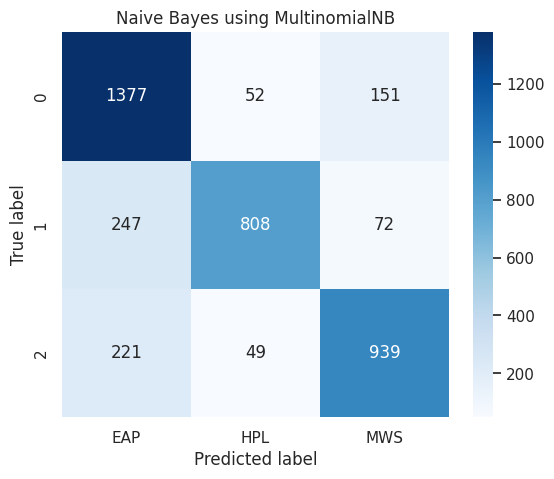

In [36]:
conf_matrix(y_test, y_pred_test,
            n_class = 3,
            title_name = "Naive Bayes using MultinomialNB",
            class_names = ['EAP', 'HPL', 'MWS'])

### k-Nearest Neighbors (n = 500)
* Performance is significantly worse now that Sentiment Analysis was added as a feature

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Build k-NN classification model
kNN = KNeighborsClassifier(n_neighbors=500)

###### >> Evaluation metrics

In [38]:
# Measures accuracy, by comparing 'y_pred_test' that has the predicted authors
# with the list of actual autors in "y_test"
# score1 = metrics.accuracy_score(y_test, y_pred_test)
score1 = get_score(kNN, X_train_tfidf, X_test_tfidf, y_train, y_test)
print('accuracy: %0.3f' % score1)

print('***********************************************************************')

# Train the model using the train set, where the model
# correlates 'Texts' to 'Labels'
kNN.fit(X_train_tfidf, y_train)

# The model predicts the 'Labels' for the 'Texts' of test
y_pred_test = kNN.predict(X_test_tfidf)

# Evaluation metrics
print(metrics.classification_report(y_test, y_pred_test,
                                    target_names=['EAP', 'HPL', "MWS"]))

print('***********************************************************************')

print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred_test)

accuracy: 0.414
***********************************************************************
              precision    recall  f1-score   support

         EAP       0.44      0.73      0.55      1580
         HPL       0.36      0.34      0.35      1127
         MWS       0.35      0.07      0.11      1209

    accuracy                           0.41      3916
   macro avg       0.38      0.38      0.34      3916
weighted avg       0.39      0.41      0.36      3916

***********************************************************************
Confusion matrix:


array([[1151,  351,   78],
       [ 663,  386,   78],
       [ 796,  330,   83]])

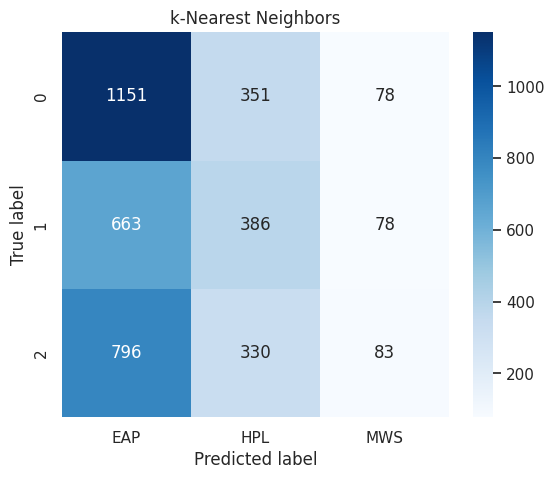

In [39]:
conf_matrix(y_test, y_pred_test,
            n_class = 3,
            title_name = "k-Nearest Neighbors",
            class_names = ['EAP', 'HPL', 'MWS'])

### Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build Logistic Regression classification model
logistic_regression = LogisticRegression(max_iter=1000)

###### >> Evaluation metrics

In [41]:
# Measures accuracy, by comparing 'y_pred_test' that has the predicted authors
# with the list of actual autors in "y_test"
#score1 = metrics.accuracy_score(y_test, y_pred_test)
score1 = get_score(logistic_regression, X_train_tfidf, X_test_tfidf, y_train, y_test)
print('accuracy: %0.3f' % score1)

print('***********************************************************************')

# Train the model using the train set, where the model
# correlates 'Texts' to 'Labels'
logistic_regression.fit(X_train_tfidf, y_train)

# The model predicts the 'Labels' for the 'Texts' of test
y_pred_test = logistic_regression.predict(X_test_tfidf)

# Evaluation metrics
print(metrics.classification_report(y_test, y_pred_test,
                                    target_names=['EAP', 'HPL', "MWS"]))

print('***********************************************************************')

print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.804
***********************************************************************
              precision    recall  f1-score   support

         EAP       0.78      0.83      0.81      1580
         HPL       0.82      0.79      0.81      1127
         MWS       0.82      0.78      0.80      1209

    accuracy                           0.80      3916
   macro avg       0.81      0.80      0.80      3916
weighted avg       0.81      0.80      0.80      3916

***********************************************************************
Confusion matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1316,  121,  143],
       [ 176,  891,   60],
       [ 194,   73,  942]])

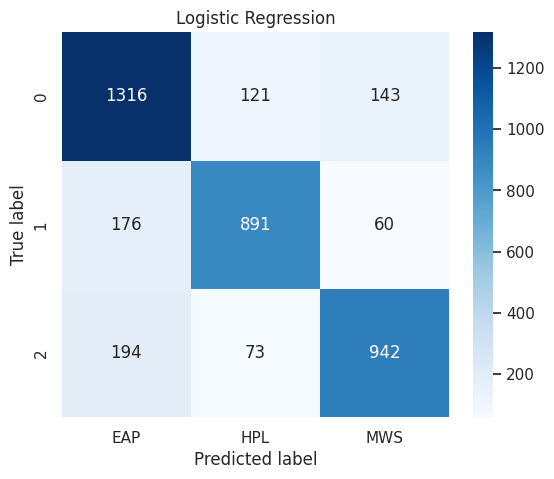

In [42]:
conf_matrix(y_test, y_pred_test,
            n_class = 3,
            title_name = "Logistic Regression",
            class_names = ['EAP', 'HPL', 'MWS'])

### Random Forest

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build Random classification model
random_Forest = RandomForestClassifier()

###### >> Evaluation metrics

In [44]:
# Measures accuracy, by comparing 'y_pred_test' that has the predicted authors
# with the list of actual autors in "y_test"
# score1 = metrics.accuracy_score(y_test, y_pred_test)
score1 = get_score(random_Forest, X_train_tfidf, X_test_tfidf, y_train, y_test)
print('accuracy: %0.3f' % score1)

print('***********************************************************************')

# Train the model using the train set, where the model
# correlates 'Texts' to 'Labels'
random_Forest.fit(X_train_tfidf, y_train)

# The model predicts the 'Labels' for the 'Texts' of test
y_pred_test = random_Forest.predict(X_test_tfidf)

# Evaluation metrics
print(metrics.classification_report(y_test, y_pred_test,
                                    target_names=['EAP', 'HPL', "MWS"]))

print('***********************************************************************')

print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred_test)

accuracy: 0.686
***********************************************************************
              precision    recall  f1-score   support

         EAP       0.63      0.80      0.71      1580
         HPL       0.71      0.59      0.65      1127
         MWS       0.76      0.60      0.67      1209

    accuracy                           0.68      3916
   macro avg       0.70      0.67      0.67      3916
weighted avg       0.69      0.68      0.68      3916

***********************************************************************
Confusion matrix:


array([[1271,  156,  153],
       [ 381,  667,   79],
       [ 364,  117,  728]])

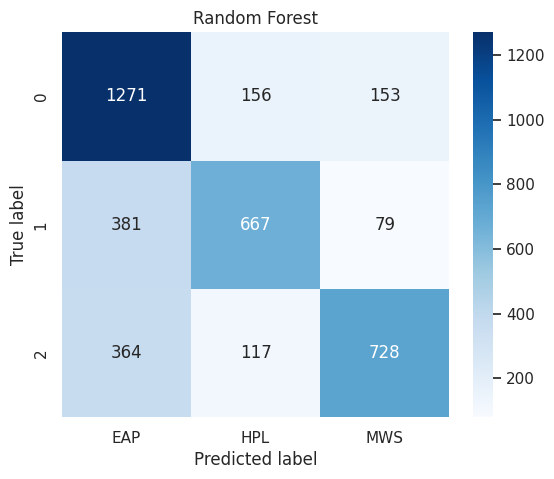

In [45]:
conf_matrix(y_test, y_pred_test,
            n_class = 3,
            title_name = "Random Forest",
            class_names = ['EAP', 'HPL', 'MWS'])

### Gradient Bossting

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Gradient Boosting classification model
gradient_boosting = GradientBoostingClassifier()

###### >> Evaluation metrics

In [47]:
# Measures accuracy, by comparing 'y_pred_test' that has the predicted authors
# with the list of actual autors in "y_test"
# score1 = metrics.accuracy_score(y_test, y_pred_test)
score1 = get_score(gradient_boosting, X_train_tfidf, X_test_tfidf, y_train, y_test)
print('accuracy: %0.3f' % score1)

print('***********************************************************************')

# Train the model using the train set, where the model
# correlates 'Texts' to 'Labels'
gradient_boosting.fit(X_train_tfidf, y_train)

# The model predicts the 'Labels' for the 'Texts' of test
y_pred_test = gradient_boosting.predict(X_test_tfidf)

# Evaluation metrics
print(metrics.classification_report(y_test, y_pred_test,
                                    target_names=['EAP', 'HPL', "MWS"]))

print('***********************************************************************')

print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred_test)

accuracy: 0.629
***********************************************************************
              precision    recall  f1-score   support

         EAP       0.56      0.87      0.68      1580
         HPL       0.74      0.47      0.57      1127
         MWS       0.76      0.46      0.58      1209

    accuracy                           0.63      3916
   macro avg       0.69      0.60      0.61      3916
weighted avg       0.67      0.63      0.62      3916

***********************************************************************
Confusion matrix:


array([[1371,  105,  104],
       [ 523,  530,   74],
       [ 564,   83,  562]])

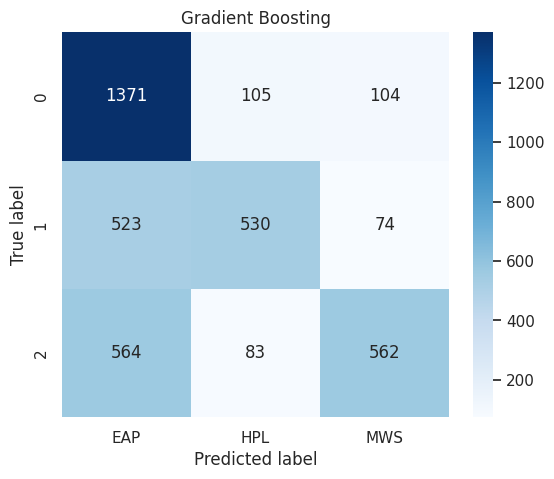

In [48]:
conf_matrix(y_test, y_pred_test,
            n_class = 3,
            title_name = "Gradient Boosting",
            class_names = ['EAP', 'HPL', 'MWS'])